The organic data set having 10 attributes, 3 rows are merged into single row, We have done the feature processing.

In [1]:
#load the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,KBinsDiscretizer,OneHotEncoder,StandardScaler
 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
 
from sklearn.metrics import confusion_matrix,recall_score
from sklearn.compose import ColumnTransformer
 
from scipy import stats
 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ORGANIC_10ATT.xlsx to ORGANIC_10ATT.xlsx


In [4]:
df = pd.read_excel('/content/ORGANIC_10ATT.xlsx')  #read data
df.head()

,book,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,0.0900,1.196,1.209,1.228,0.6096,0.6501,0.7096
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.10120,0.1000,1.235,1.417,1.420,0.7315,0.4472,0.4551
2,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,0.1162,1.440,1.440,1.442,0.8090,0.8090,0.3024
3,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,0.1200,1.446,1.448,1.455,0.4768,0.4853,0.3128
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10870,0.1012,1.472,1.476,1.486,0.3225,0.3527,0.5203


In [5]:
df.shape

(81721, 10)

In [6]:
df.head()

,book,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,0.0900,1.196,1.209,1.228,0.6096,0.6501,0.7096
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.10120,0.1000,1.235,1.417,1.420,0.7315,0.4472,0.4551
2,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,0.1162,1.440,1.440,1.442,0.8090,0.8090,0.3024
3,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,0.1200,1.446,1.448,1.455,0.4768,0.4853,0.3128
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10870,0.1012,1.472,1.476,1.486,0.3225,0.3527,0.5203


In [7]:
df.isnull().sum()

book    0
λ1      0
λ2      0
λ3      0
n1      0
n2      0
n3      0
k1      0
k2      0
k3      0
dtype: int64

# Shuffle

In [8]:
display(df.head())
df = df.sample(frac=1).reset_index(drop= True)
df.head()

,book,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3
0,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.09000,0.0900,1.196,1.209,1.228,0.6096,0.6501,0.7096
1,(C2ClF3)n - polychlorotrifluoroethylene,0.09000,0.10120,0.1000,1.235,1.417,1.420,0.7315,0.4472,0.4551
2,(C2ClF3)n - polychlorotrifluoroethylene,0.08266,0.08266,0.1162,1.440,1.440,1.442,0.8090,0.8090,0.3024
3,(C2ClF3)n - polychlorotrifluoroethylene,0.10120,0.10000,0.1200,1.446,1.448,1.455,0.4768,0.4853,0.3128
4,(C2ClF3)n - polychlorotrifluoroethylene,0.11620,0.10870,0.1012,1.472,1.476,1.486,0.3225,0.3527,0.5203


,book,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3
0,toluene,2.38104,2.38132,2.38159,1.47370,1.47369,1.47369,0.000160,0.000159,0.000158
1,benzene,1.42385,1.42395,1.42405,1.47775,1.47775,1.47775,0.000016,0.000016,0.000016
2,acetonitrile,3.16516,3.16564,3.16612,1.33308,1.33305,1.33301,0.002650,0.002480,0.002340
3,trichlorobenzene,5.18657,5.18787,5.18916,1.53949,1.53946,1.53945,0.000109,0.000109,0.000109
4,ethanol,2.74810,2.74774,6.86548,1.31792,1.31798,1.31799,0.000823,0.000810,0.046134


In [9]:
x = df.drop('book', axis=1) # Input features (attributes)
y = df['book']   # Taget Vector

print('X shape: {}'.format(np.shape(x)))
print('Y shape: {}'.format(np.shape(y)))

X shape: (81721, 9)
Y shape: (81721,)


In [10]:
#split the data for training and testing
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [11]:
print('Length of x_test : {}\nLength of y_test : {}\nLength of x_train : {}\nLength of y_train : {}'.format(len(x_test),  len(y_test), len(x_train), len(y_train)))

Length of x_test : 20431
Length of y_test : 20431
Length of x_train : 61290
Length of y_train : 61290


RANDOM FOREST WITH 10 EQUAL BINS

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [13]:
df.sample()

,book,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3
3828,propanol,1.406,1.40609,1.40619,1.36191,1.36191,1.36191,0.000033,0.000033,0.000033


In [14]:
numeric_features = ['λ1',	'λ2','λ3', 'n1',	'n2',	'n3', 'k1',	'k2', 'k3']

In [15]:
#preprocessing and training pipeline with binning

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler()),
                                      ('binning',KBinsDiscretizer(n_bins=10,encode='onehot')) #apply binning in 10 groups and one hot encode them
                                      ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features)   #apply the transformation
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [16]:
#model
rf_model = pipeline.fit(x_train, y_train)
print (rf_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('binning',
                                                                   KBinsDiscretizer(n_bins=10))]),
                                                  ['λ1', 'λ2', 'λ3', 'n1', 'n2',
                                                   'n3', 'k1', 'k2', 'k3'])])),
                ('regressor', RandomForestClassifier())])


In [17]:
# You can check the training and testing accuracy down below of the df1 dataset
print(f'Training accuracy {rf_model.score(x_train,y_train)}')
print(f'Test accuracy {rf_model.score(x_test,y_test)}')

Training accuracy 0.760629792788383
Test accuracy 0.7320738094072733


## Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score
cv_four = cross_val_score(rf_model, x, y, cv = 4, scoring = 'accuracy')
print(cv_four)
print('Mean:',cv_four.mean())

[0.73907298 0.73920705 0.73778757 0.73475281]
Mean: 0.7377051018969979


In [20]:
from sklearn.model_selection import cross_val_score
cv_five = cross_val_score(rf_model, x, y, cv = 5, scoring = 'accuracy')
print(cv_five)
print('Mean:',cv_five.mean())

[0.73955338 0.73598874 0.73782428 0.73250122 0.73500979]
Mean: 0.7361754827045981


In [21]:
df['λ_binned'] = pd.cut(df['λ1'], [0, 1.5, 4.0,np.inf],labels=['UV','mid_IR','IR'],)
df.head()

,book,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3,λ_binned
0,toluene,2.38104,2.38132,2.38159,1.47370,1.47369,1.47369,0.000160,0.000159,0.000158,mid_IR
1,benzene,1.42385,1.42395,1.42405,1.47775,1.47775,1.47775,0.000016,0.000016,0.000016,UV
2,acetonitrile,3.16516,3.16564,3.16612,1.33308,1.33305,1.33301,0.002650,0.002480,0.002340,mid_IR
3,trichlorobenzene,5.18657,5.18787,5.18916,1.53949,1.53946,1.53945,0.000109,0.000109,0.000109,IR
4,ethanol,2.74810,2.74774,6.86548,1.31792,1.31798,1.31799,0.000823,0.000810,0.046134,mid_IR


In [22]:
new_df = df.copy()
new_df.drop('λ1',axis=1,inplace=True)
y = new_df['book']
x = new_df.drop('book',axis=1)

In [23]:
#split the data for training and testing
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42,stratify=x.λ_binned)

In [24]:
cat_features = ['λ_binned']
numeric_features = ['n1','n2','n3','k1','k2','k3']

In [25]:
#preprocessing and training pipeline with our own bins

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler())
                                      ])

categorical_transformer = Pipeline(steps=[
                                          ('onehot',OneHotEncoder())
                                          ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features),   #apply the transformation
                  ('category',categorical_transformer,cat_features)
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

Applied the Random Forest Algorithm without Binning

In [26]:
rf_model_bin_one = pipeline.fit(x_train, y_train)
print (rf_model_bin_one)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['n1', 'n2', 'n3', 'k1', 'k2',
                                                   'k3']),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['λ_binned'])])),
                ('regressor', RandomForestClassifier())])


In [27]:
print(f'Training accuracy {rf_model_bin_one.score(x_train,y_train)}')
print(f'Test accuracy {rf_model_bin_one.score(x_test,y_test)}')

Training accuracy 0.9963452439223365
Test accuracy 0.8234056091233909


## Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score
cv_four = cross_val_score(rf_model_bin_one, x, y, cv = 4, scoring = 'accuracy')
print(cv_four)
print('Mean:',cv_four.mean())

[0.82110518 0.82334802 0.8246696  0.8206559 ]
Mean: 0.82244467565855


In [33]:
from sklearn.model_selection import cross_val_score
cv_five = cross_val_score(rf_model_bin_one, x, y, cv = 5, scoring = 'accuracy')
print(cv_five)
print('Mean:',cv_five.mean())

[0.82018966 0.82488987 0.82342144 0.82219775 0.82030103]
Mean: 0.8221999487315168


In [34]:
pred = rf_model_bin_one.predict(x_test)

In [35]:
pred

array(['polydimethylsiloxane', 'toluene', 'dimethyl_methylphosphonate',
       ..., 'trichlorobenzene', 'propanol', 'polystyren'], dtype=object)

In [36]:
x_test.head()

,λ2,λ3,n1,n2,n3,k1,k2,k3,λ_binned
60167,0.52400,0.52500,1.42031,1.42023,1.42015,0.000000,0.000000,0.000000,UV
62344,3.06144,3.06189,1.47071,1.47070,1.47070,0.000186,0.000186,0.000186,mid_IR
39333,5.11223,5.11349,1.37862,1.37862,1.37861,0.001572,0.001560,0.001548,IR
24497,3.46187,10.79150,1.37718,1.37719,1.37720,0.007501,0.054298,0.000162,mid_IR
35587,1.99531,1.99551,1.33346,1.33346,1.33346,0.000017,0.000018,0.000018,mid_IR


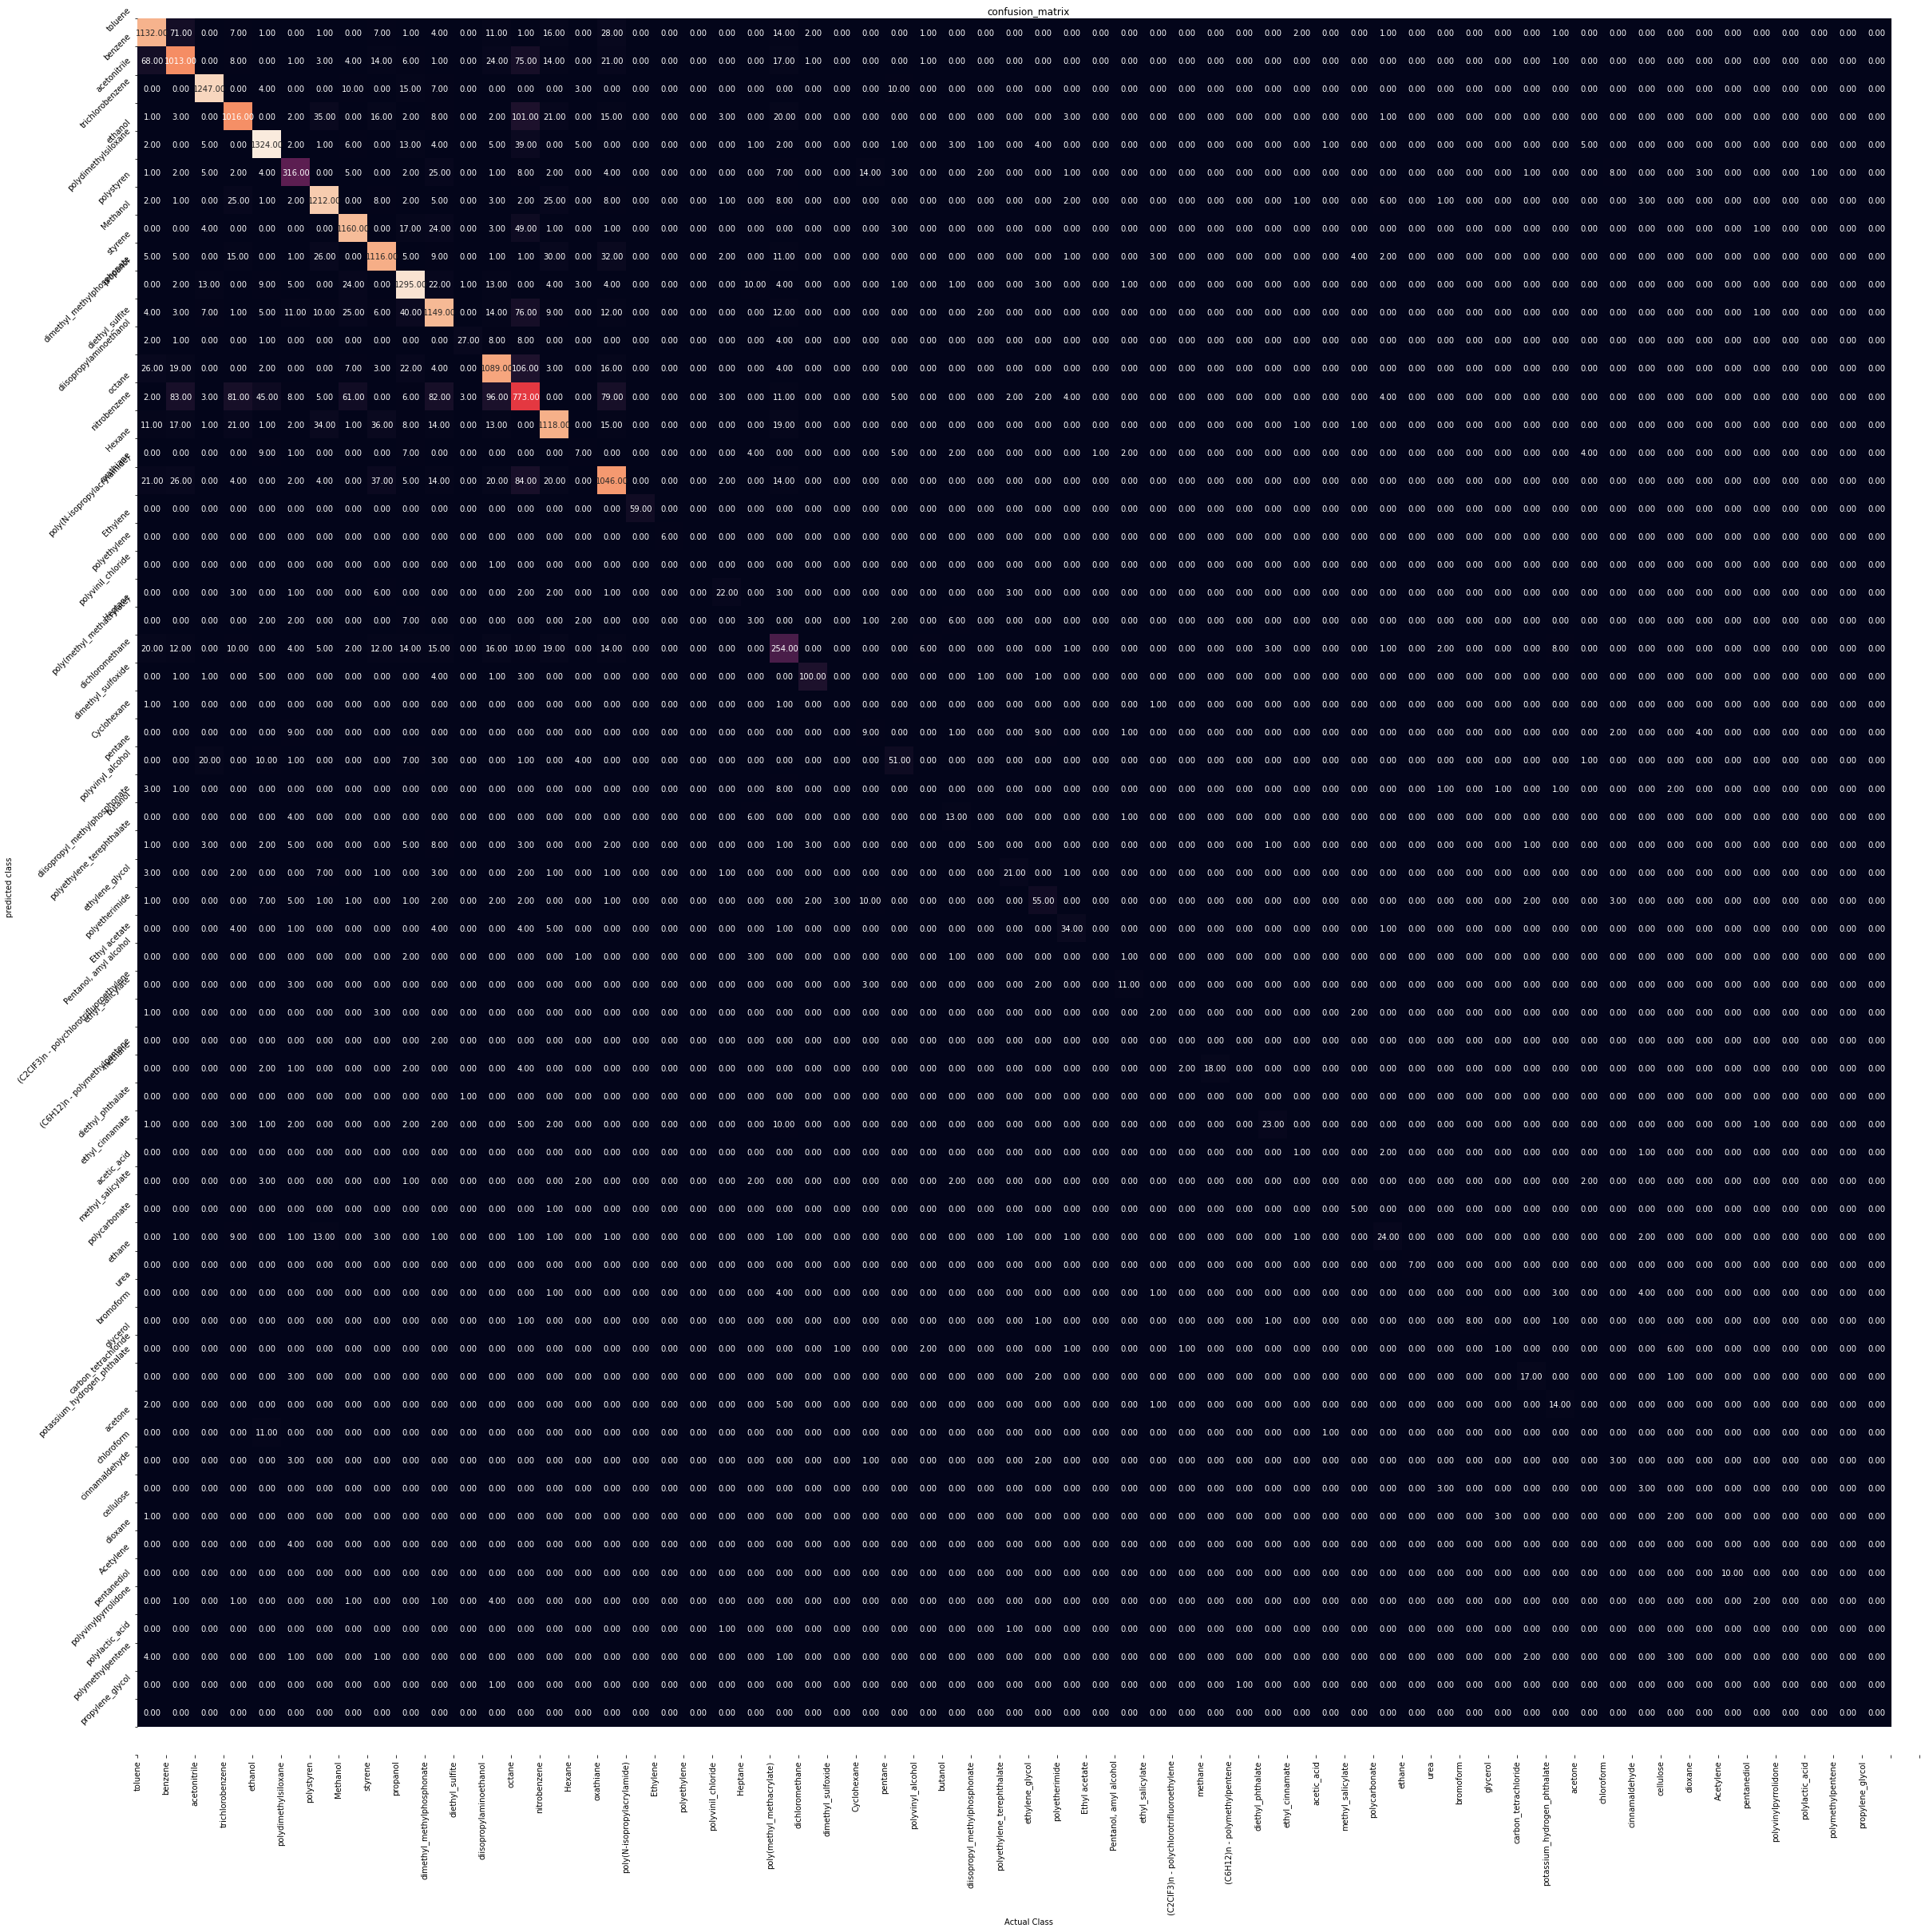

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
cm = confusion_matrix(y_test,pred,labels=list(df.book.unique()))
sns.heatmap(cm,annot=True,fmt='.2f',cbar=False)
plt.xticks(range(0,63),labels=list(df.book.unique()),rotation=90)
plt.yticks(range(0,63),labels=list(df.book.unique()),rotation=45)
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Actual Class')
plt.ylabel('predicted class')
plt.show()

In [38]:
UV = x_test[x_test.λ_binned=='UV']
UV_y = y_test[x_test.λ_binned=='UV']
MID_IR = x_test[x_test.λ_binned=='mid_IR']
MID_IR_y = y_test[x_test.λ_binned=='mid_IR']
IR = x_test[x_test.λ_binned=='IR']
IR_y = y_test[x_test.λ_binned=='IR']

TRAINING ACCURACY FOR 3 BINS

In [39]:
labls = ['UV','mid_IR','IR']
tr_scores = []

for l in labls:
  train_x = x_train[x_train.λ_binned==l]
  train_y = y_train[x_train.λ_binned==l]
 
  tr_scores.append(rf_model_bin_one.score(train_x,train_y))

In [40]:
# Accuracy on the bases of Wavelength Category:
for i in range(len(labls)):
    print(labls[i],':', tr_scores[i])

UV : 1.0
mid_IR : 0.9934385529349176
IR : 0.999879995199808


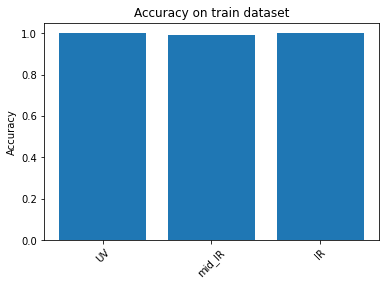

In [41]:
labls = ['UV','mid_IR','IR']
plt.bar(labls,tr_scores)
plt.title('Accuracy on train dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

TEST ACCURACY

In [42]:
labls = ['UV','mid_IR','IR']
ts_scores = []

for l in labls:
  test_x = x_test[x_test.λ_binned==l]
  test_y = y_test[x_test.λ_binned==l]
 
  ts_scores.append(rf_model_bin_one.score(test_x,test_y))


In [43]:
# Accuracy on the bases of Wavelength Category:
for i in range(len(labls)):
    print(labls[i],':', ts_scores[i])

UV : 0.8687795385043091
mid_IR : 0.8718858054792091
IR : 0.6955895589558956


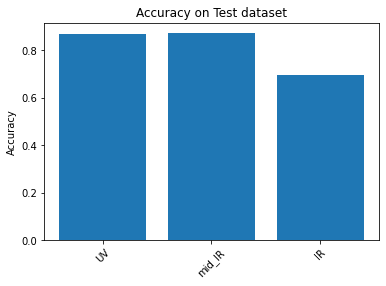

In [44]:
labls = ['UV','mid_IR','IR']
plt.bar(labls,ts_scores)
plt.title('Accuracy on Test dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

PREDICTING THE LABELS

In [45]:
print(UV[10:12])
print('-'*90,end='\n\n')
print('Actual Class\n\n',UV_y[10:12])
print('-'*90,end='\n\n')
print('Predicted class\n\n',rf_model_bin_one.predict(UV[10:12]))

           λ2      λ3        n1        n2        n3        k1        k2  \
438    1.4660  1.4930  1.367958  1.367845  1.367727  0.000000  0.000000   
75218  1.4653  1.4654  1.477730  1.477730  1.477730  0.000014  0.000014   

             k3 λ_binned  
438    0.000000       UV  
75218  0.000014       UV  
------------------------------------------------------------------------------------------

Actual Class

 438      propanol
75218     benzene
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class

 ['pentane' 'benzene']


In [46]:
print(MID_IR[10:12])
print('-'*90,end='\n\n')
print('Actual Class\n\n',MID_IR_y[10:12])
print('-'*90,end='\n\n')
print('Predicted class\n\n',rf_model_bin_one.predict(MID_IR[10:12]))

            λ2       λ3       n1       n2       n3        k1        k2  \
23487  1.84725  1.84742  1.42726  1.42726  1.42726  0.000053  0.000053   
36002  2.20484  2.20508  1.42524  1.42524  1.42524  0.000094  0.000094   

             k3 λ_binned  
23487  0.000053   mid_IR  
36002  0.000094   mid_IR  
------------------------------------------------------------------------------------------

Actual Class

 23487    diisopropylaminoethanol
36002    diisopropylaminoethanol
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class

 ['diisopropylaminoethanol' 'diisopropylaminoethanol']


In [47]:
print(IR[10:12])
print('-'*90,end='\n\n')
print('Actual Class\n',IR_y[10:12])
print('-'*90,end='\n\n')
print('Predicted class\n',rf_model_bin_one.predict(IR[10:12]))

             λ2        λ3       n1       n2       n3        k1        k2  \
79630   5.37617   5.37756  1.33170  1.33169  1.33168  0.000277  0.000279   
31818  11.47100  11.57300  1.52193  1.51569  1.50969  0.012900  0.013100   

             k3 λ_binned  
79630  0.000281       IR  
31818  0.015600       IR  
------------------------------------------------------------------------------------------

Actual Class
 79630                 acetonitrile
31818    poly(methyl_methacrylate)
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class
 ['acetonitrile' 'poly(methyl_methacrylate)']


In [48]:
df.columns

Index(['book', 'λ1', 'λ2', 'λ3', 'n1', 'n2', 'n3', 'k1', 'k2', 'k3',
       'λ_binned'],
      dtype='object')

In [49]:
sec_df = df.drop('λ_binned',axis=1).copy()
sec_df.head()

,book,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3
0,toluene,2.38104,2.38132,2.38159,1.47370,1.47369,1.47369,0.000160,0.000159,0.000158
1,benzene,1.42385,1.42395,1.42405,1.47775,1.47775,1.47775,0.000016,0.000016,0.000016
2,acetonitrile,3.16516,3.16564,3.16612,1.33308,1.33305,1.33301,0.002650,0.002480,0.002340
3,trichlorobenzene,5.18657,5.18787,5.18916,1.53949,1.53946,1.53945,0.000109,0.000109,0.000109
4,ethanol,2.74810,2.74774,6.86548,1.31792,1.31798,1.31799,0.000823,0.000810,0.046134


### THE DATASET IS DIVIDED INTO 5 BINS, UV','visible_light','near_IR','IR_rays','Far_IR_Rays

In [50]:
sec_df['λ_binned'] = pd.cut(sec_df['λ1'], [-np.inf,0.4,0.75,1.5,4.0,np.inf],
                            labels=['UV','visible_light','near_IR','IR_rays','Far_IR_Rays'])
sec_df.head()

,book,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3,λ_binned
0,toluene,2.38104,2.38132,2.38159,1.47370,1.47369,1.47369,0.000160,0.000159,0.000158,IR_rays
1,benzene,1.42385,1.42395,1.42405,1.47775,1.47775,1.47775,0.000016,0.000016,0.000016,near_IR
2,acetonitrile,3.16516,3.16564,3.16612,1.33308,1.33305,1.33301,0.002650,0.002480,0.002340,IR_rays
3,trichlorobenzene,5.18657,5.18787,5.18916,1.53949,1.53946,1.53945,0.000109,0.000109,0.000109,Far_IR_Rays
4,ethanol,2.74810,2.74774,6.86548,1.31792,1.31798,1.31799,0.000823,0.000810,0.046134,IR_rays


In [51]:
sec_df.drop('λ1',axis=1,inplace=True)
y = sec_df['book']
x = sec_df.drop('book',axis=1)

In [52]:
#split the data for training and testing
from sklearn.metrics import accuracy_score,classification_report
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42,stratify=x.λ_binned)

In [53]:
#preprocessing and training pipeline with our own bins

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler())
                                      ])

categorical_transformer = Pipeline(steps=[
                                          ('onehot',OneHotEncoder())
                                          ])

preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features),   #apply the transformation
                  ('category',categorical_transformer,cat_features)
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [54]:
rf_model_bin_two = pipeline.fit(x_train, y_train)
print (rf_model_bin_two)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['n1', 'n2', 'n3', 'k1', 'k2',
                                                   'k3']),
                                                 ('category',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['λ_binned'])])),
                ('regressor', RandomForestClassifier())])


In [55]:
print(f'Training accuracy {rf_model_bin_two.score(x_train,y_train)}')
print(f'Test accuracy {rf_model_bin_two.score(x_test,y_test)}')

Training accuracy 0.9963778756730298
Test accuracy 0.8254613087954579


In [56]:
print(f'Training accuracy {rf_model_bin_two.score(x_train,y_train)}')
print(f'Test accuracy {rf_model_bin_two.score(x_test,y_test)}')

Training accuracy 0.9963778756730298
Test accuracy 0.8254613087954579


## Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score
cv_four = cross_val_score(rf_model_bin_two, x, y, cv = 4, scoring = 'accuracy')
print(cv_four)
print('Mean:',cv_four.mean())

[0.82399295 0.82721488 0.82819383 0.82520803]
Mean: 0.8261524229937361


In [58]:
from sklearn.model_selection import cross_val_score
cv_five = cross_val_score(rf_model_bin_two, x, y, cv = 5, scoring = 'accuracy')
print(cv_five)
print('Mean:',cv_five.mean())

[0.82502294 0.82776554 0.82794909 0.82562408 0.82544053]
Mean: 0.8263604378005043


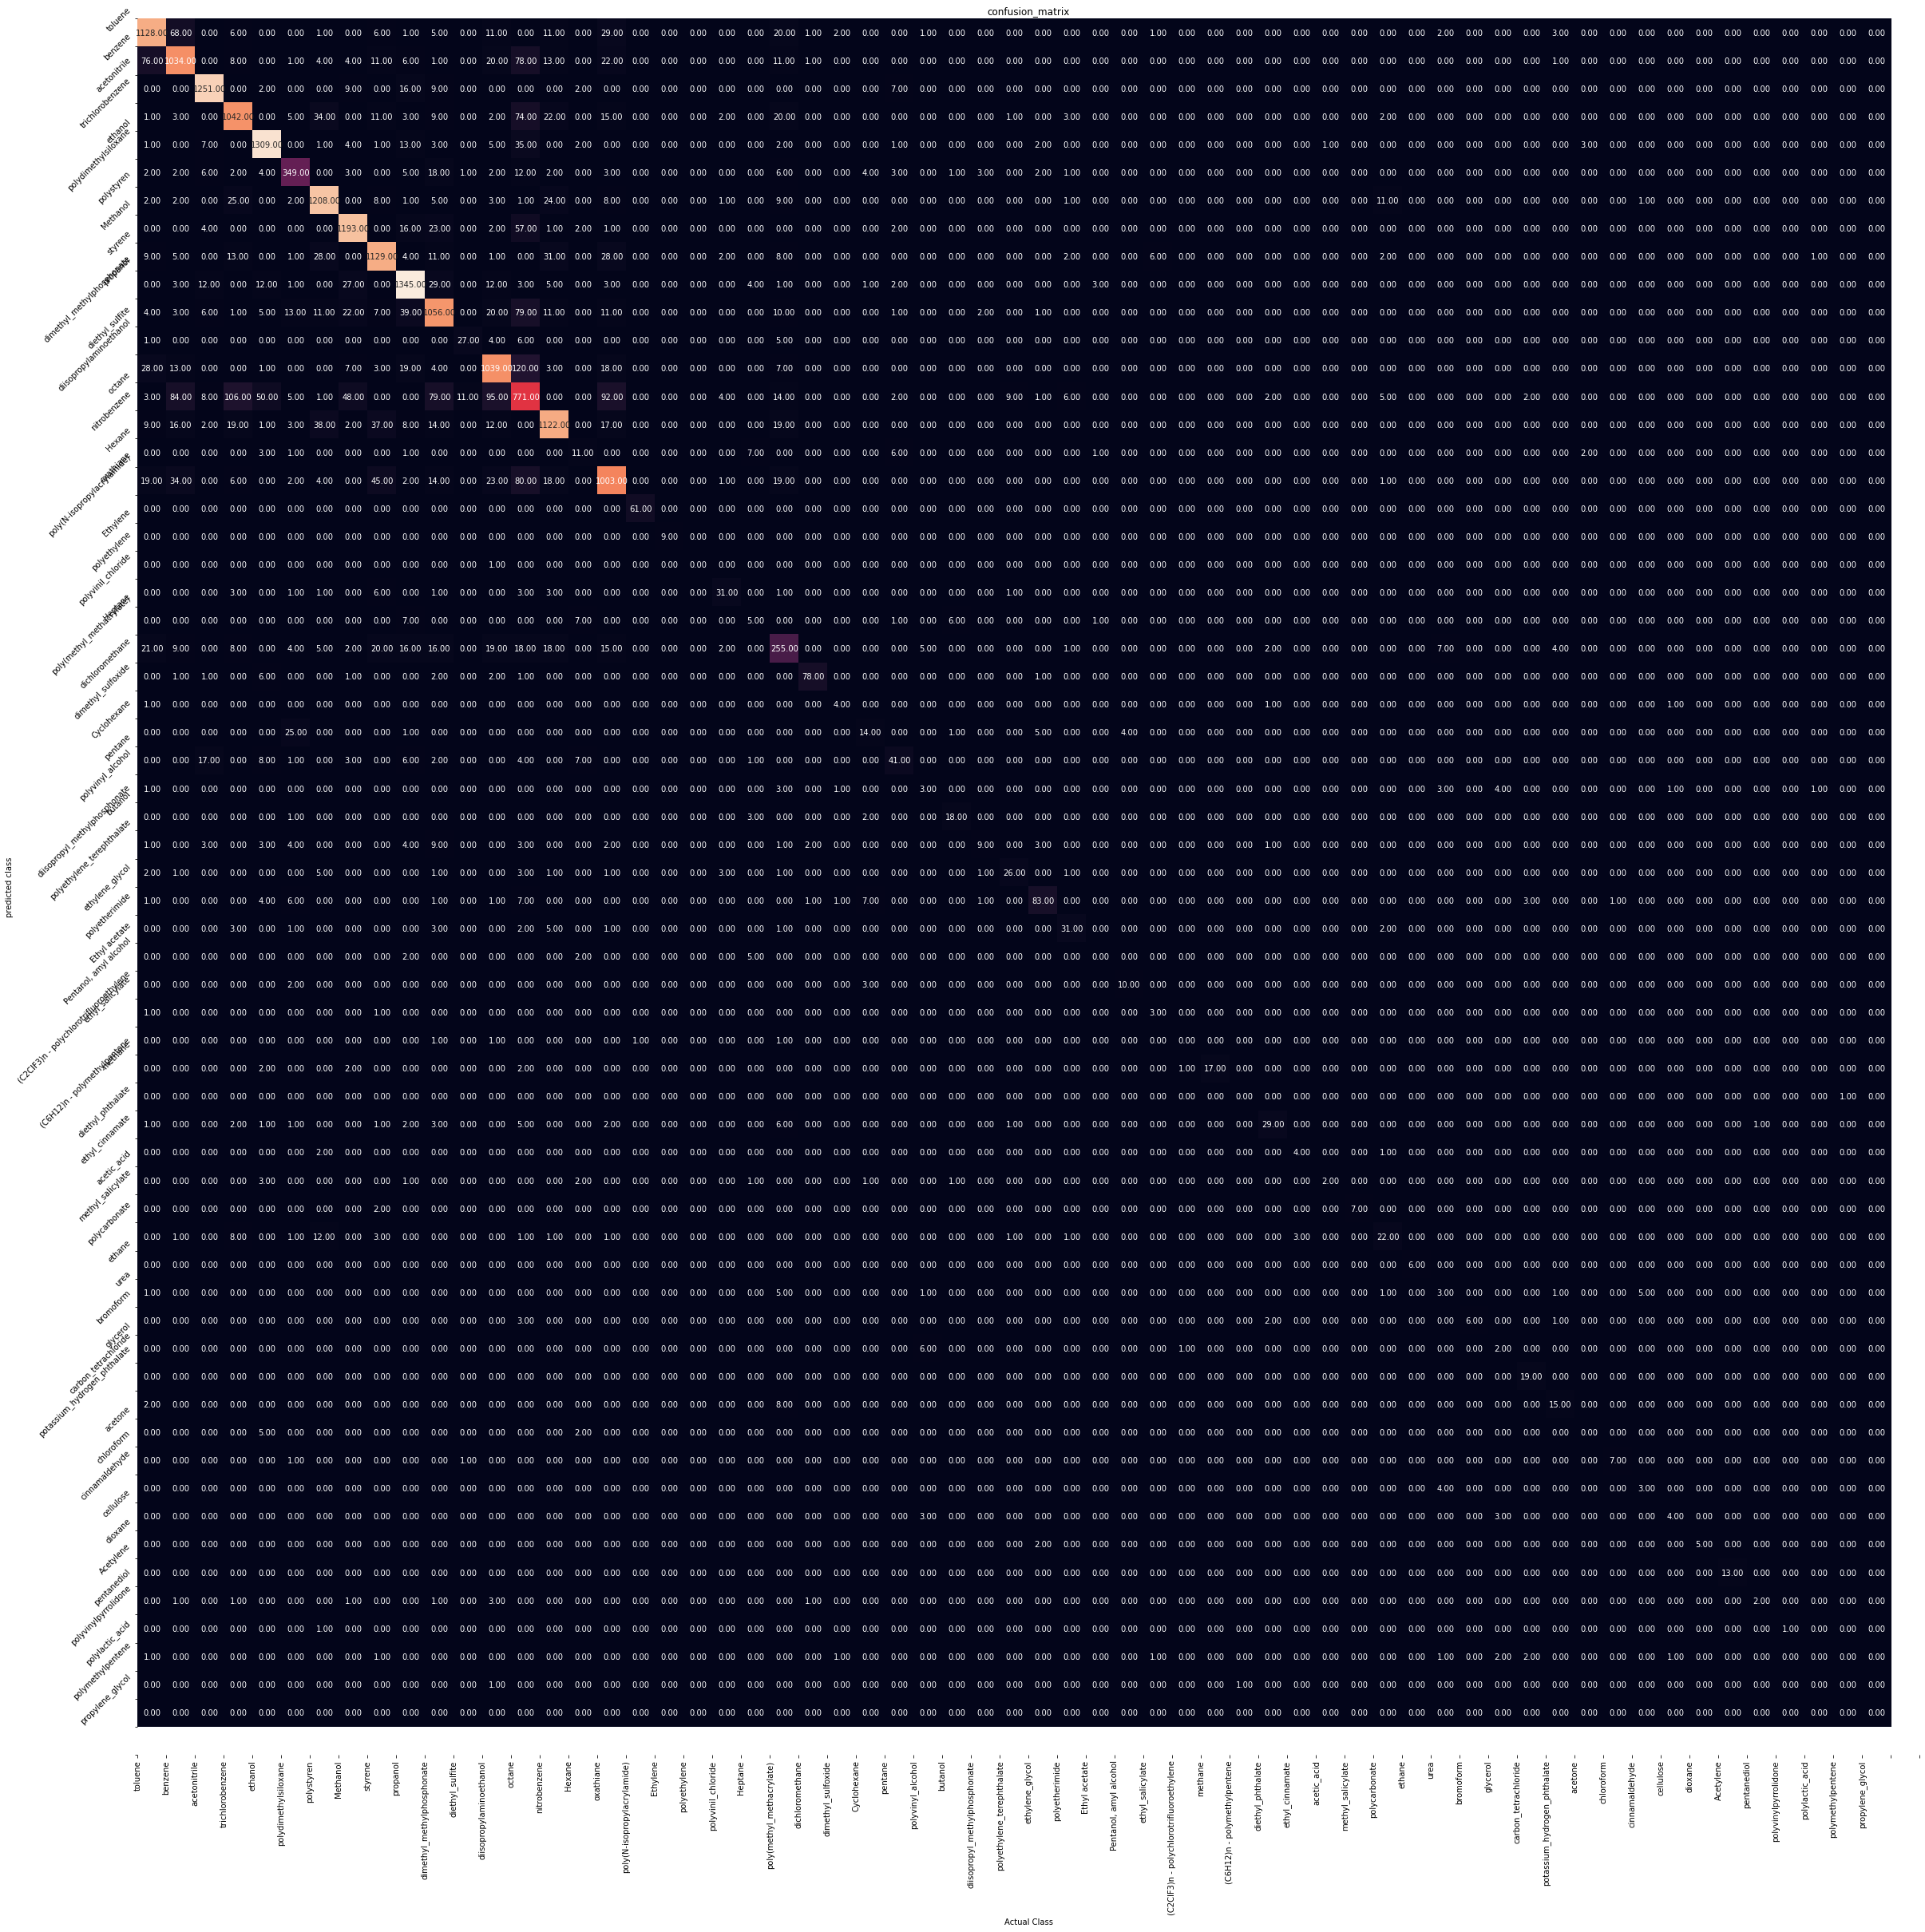

In [59]:
pred = rf_model_bin_two.predict(x_test)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
cm = confusion_matrix(y_test,pred,labels=list(df.book.unique()))
sns.heatmap(cm,annot=True,fmt='.2f',cbar=False)
plt.xticks(range(0,63),labels=list(df.book.unique()),rotation=90)
plt.yticks(range(0,63),labels=list(df.book.unique()),rotation=45)
plt.title('confusion_matrix')         #checking the confusion matrix
plt.xlabel('Actual Class')
plt.ylabel('predicted class')
plt.show()

In [60]:
UV = x_test[x_test.λ_binned== 'UV']
UV_y = y_test[x_test.λ_binned== 'UV']
Visible = x_test[x_test.λ_binned== "Visible"]
Visible_y = y_test[x_test.λ_binned == "Visible"]
Near_IR = x_test[x_test.λ_binned== 'Near_IR']
Near_IR_y = y_test[x_test.λ_binned== 'Near_IR']
IR = x_test[x_test.λ_binned== 'IR']
IR_y = y_test[x_test.λ_binned== 'IR']
Far_IR = x_test[x_test.λ_binned== 'Far_IR']
Far_IR_y = y_test[x_test.λ_binned== 'Far_IR']

TRAINING ACCURACY

In [61]:
labls = ['UV','Far_IR_Rays','IR_rays',"near_IR",'visible_light']
tr_scores = []

for l in labls:
  train_x = x_train[x_train.λ_binned==l]
  train_y = y_train[x_train.λ_binned==l]
 
  tr_scores.append(rf_model_bin_two.score(train_x,train_y))

In [62]:
# Accuracy on the bases of Wavelength Category:
for i in range(len(labls)):
    print(labls[i],':', tr_scores[i])

UV : 1.0
Far_IR_Rays : 0.999939997599904
IR_rays : 0.9934681090027783
near_IR : 1.0
visible_light : 1.0


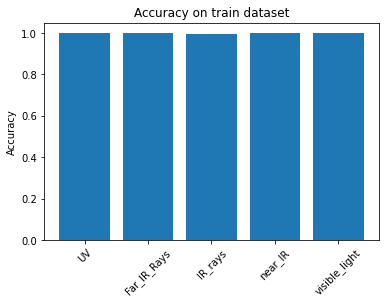

In [64]:
labls = ['UV','Far_IR_Rays','IR_rays',"near_IR",'visible_light']
plt.bar(labls,tr_scores)
plt.title('Accuracy on train dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

TESTING ACCURACY

In [63]:
labls = ['UV','Far_IR_Rays','IR_rays',"near_IR",'visible_light']
ts_scores = []

for l in labls:
  test_x = x_test[x_test.λ_binned==l]
  test_y = y_test[x_test.λ_binned==l]
 
  ts_scores.append(rf_model_bin_two.score(test_x,test_y))

In [65]:
# Accuracy on the bases of Wavelength Category:
for i in range(len(labls)):
    print(labls[i],':', ts_scores[i])

UV : 0.6122448979591837
Far_IR_Rays : 0.6932493249324932
IR_rays : 0.8669208263143896
near_IR : 0.9756180155773789
visible_light : 0.5331991951710262


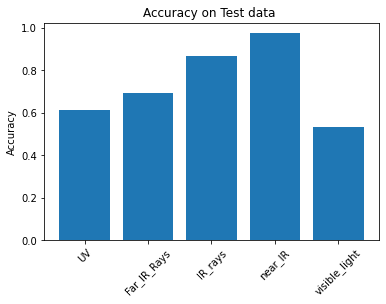

In [66]:
labls = ['UV','Far_IR_Rays','IR_rays',"near_IR",'visible_light']
plt.bar(labls,ts_scores)
plt.title('Accuracy on Test data ')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

PREDICTING THE LABELS

In [67]:
print(UV[10:12])
print('-'*90,end='\n\n')
print('Actual Class\n\n',UV_y[10:12])
print('-'*90,end='\n\n')
print('Predicted class\n\n',rf_model_bin_two.predict(UV[10:12]))

           λ2      λ3        n1        n2        n3      k1     k2      k3  \
8624  0.08856  0.1087  1.554000  1.570000  1.571000  0.4104  0.793  0.4231   
2533  0.31620  0.3121  1.454597  1.455806  1.457042  0.0000  0.000  0.0000   

     λ_binned  
8624       UV  
2533       UV  
------------------------------------------------------------------------------------------

Actual Class

 8624    (C2ClF3)n - polychlorotrifluoroethylene
2533                                Cyclohexane
Name: book, dtype: object
------------------------------------------------------------------------------------------

Predicted class

 ['poly(N-isopropylacrylamide)' 'polydimethylsiloxane']


### rounding off

In [68]:
df.head()

,book,λ1,λ2,λ3,n1,n2,n3,k1,k2,k3,λ_binned
0,toluene,2.38104,2.38132,2.38159,1.47370,1.47369,1.47369,0.000160,0.000159,0.000158,mid_IR
1,benzene,1.42385,1.42395,1.42405,1.47775,1.47775,1.47775,0.000016,0.000016,0.000016,UV
2,acetonitrile,3.16516,3.16564,3.16612,1.33308,1.33305,1.33301,0.002650,0.002480,0.002340,mid_IR
3,trichlorobenzene,5.18657,5.18787,5.18916,1.53949,1.53946,1.53945,0.000109,0.000109,0.000109,IR
4,ethanol,2.74810,2.74774,6.86548,1.31792,1.31798,1.31799,0.000823,0.000810,0.046134,mid_IR


In [69]:
new_df = df.copy()
new_df.drop('λ_binned',axis=1,inplace=True)

In [70]:
#preprocessing and training pipeline with our own bins

numeric_transformer = Pipeline(steps=[
                                      ('scaler', StandardScaler())
                                      ])


preprocessor = ColumnTransformer(
    transformers=[
                  ('numeric', numeric_transformer, numeric_features),   #apply the transformation
                  ]) 

pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestClassifier())
           ])

In [71]:
#split the data for training and testing

acc_tr = []
acc_ts = []

recall = []

round_place = [1,2,3,4,5]

for r in round_place:
  y = new_df['book']
  x = new_df.drop('book',axis=1).round(r)   #rounding off
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)
  rf_model = pipeline.fit(x_train,y_train)
  acc_tr.append(rf_model.score(x_train,y_train))
  acc_ts.append(rf_model.score(x_test,y_test))

  pred = rf_model.predict(x_test)

  recall.append(recall_score(y_test,pred,average='weighted'))

In [72]:
acc_tr,acc_ts,recall

([0.26638929678577256,
  0.6713330070158264,
  0.8838799151574482,
  0.9728993310491107,
  0.9936041768640888],
 [0.26234643433997357,
  0.6338896774509324,
  0.765503401693505,
  0.8019675982575498,
  0.7985414321374382],
 [0.26234643433997357,
  0.6338896774509324,
  0.765503401693505,
  0.8019675982575498,
  0.7985414321374382])

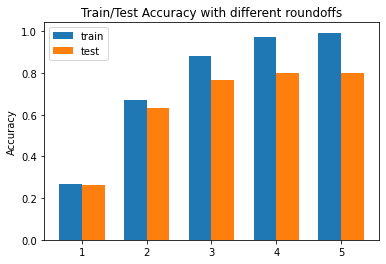

In [73]:
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
plt.title('Train/Test Accuracy with different roundoffs')
X_axis = np.arange(len(round_place))
ax.bar(X_axis - width/2,acc_tr,width,label='train')
ax.bar(X_axis + width/2,acc_ts,width,label='test')
plt.xticks(X_axis,round_place)
plt.ylabel('Accuracy')
plt.legend()
plt.show()

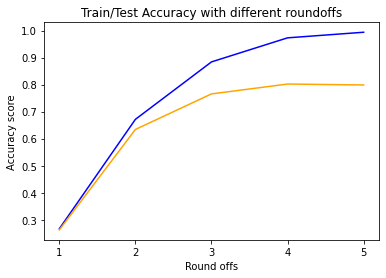

In [74]:
plt.title('Train/Test Accuracy with different roundoffs')
plt.plot(X_axis,acc_tr,color='b',label ='train')
plt.plot(X_axis,acc_ts,color='orange',label='test')
plt.xlabel('Round offs')
plt.ylabel('Accuracy score')
plt.xticks(range(len(round_place)),round_place)
plt.show()

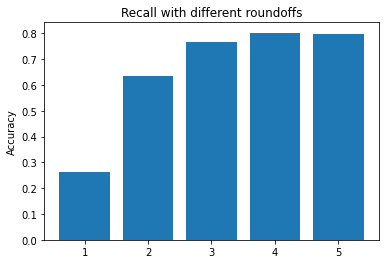

In [75]:
plt.bar(round_place,recall)
plt.title('Recall with different roundoffs')
plt.ylabel('Accuracy')
plt.show()